## PRÁCTICA 1: SIMULACIÓN REALISTA DEL POTENCIAL DE MEMBRANA DE UNA NEURONA
#### Miguel Angel Calderón
#### Alvaro alvarez
#### Runtian Wang
#### Alba Martinez

Empezaremos importando nuestras librerias:

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

### 1. Escribir un programa para resolver numéricamente el sistema de ecuaciones acopladas (1-4):
$$C_m\frac{dV}{dt} = I_{ext}-g_L(V-V_L) -g_{Na}m^{3}h(V-V_{Na})-g_kn^{4}(V-V_k)
$$  

$$\frac{dm(V)}{dt} = \alpha_m(V)(1-m)-\beta_m(V)m$$

$$\frac{dh(V)}{dt} = \alpha_h(V)(1-h)-\beta_h(V)h$$

$$\frac{dn(V)}{dt} = \alpha_n(V)(1-n)-\beta_n(V)n$$

donde V es el potencial de membrana; h,m,n son las variables de conductancia voltaje–dependientes; $C_{m}$  es la capacidad de la membrana por unidad de área; $I_{ext}=0$ es la corriente externa aplicada; $g_{L}$, $g_{Na}$, $g_{K}$, $V_{L}$, $V_{Na}$, $V_{K}$ son las conductancias máximas por unidad de área y los potenciales de equilibrio, respectivamente, para las distintas contribuciones iónicas; $\alpha$ y $\beta$  son funciones de V que se ajustan a datos fisiológicos mediante técnicas de fijación de voltaje. Las funciones originales que utilizaron Hodgkin y Huxley en sus experimentos tienen la forma:

$$\alpha_m(V) = \frac{0,1(-V-40)}{\exp({\frac{-V-40}{10}})-1}$$


$$\beta_m(V) = 4\exp({\frac{-V-65}{18}})$$


$$\alpha_h(V) = 0,07\exp({\frac{-V-65}{20}})$$


$$\beta_h(V) = \frac{1}{\exp({\frac{-V-35}{10}})+1}$$


$$\alpha_n(V) = \frac{0,01(-V-55)}{\exp({\frac{-V-55}{10}})-1}$$


$$\beta_n(V) = 0,125\exp({\frac{-V-65}{80}})$$


Los valores iniciales de las variables del modelo son los siguientes:

In [2]:
#Valores dinámicos
v=np.zeros(10000)
m=np.zeros(10000)
h=np.zeros(10000)
n=np.zeros(10000)
Ij=np.zeros(10000)

#Capacidad
c=1

#Potenciales de los diferentes canales
Vna=50
Vk=-77
Vl=-54.387

#Conductancia de los diferentes canales
gna=120
gk = 36
gl = 0.3

#Area de comportamiento (I/a para el futuro)
a=7.854*10**-3
In=(0.1)/a

#Condiciones iniciales
v0 = -65
m0 = 0.053
h0 = 0.6
n0 = 0.318

In [3]:
def alphaM(x):
  return (0.1*(-x-40))/(np.exp((-x-40)/10)-1)
def betaM(x):
  return 4*np.exp((-x-65)/18)

def alphaH(x):
  return 0.07*np.exp((-x-65)/20)
def betaH(x):
  return 1/(np.exp((-x-35)/10)+1)

def alphaN(x):
  return (0.01*(-x-55))/(np.exp((-x-55)/10)-1)
def betaN(x):
  return 0.125*np.exp((-x-65)/80)

In [4]:
def HH(x):
  for i in range(0,x):
    if i==0:
      v[i]=v0
      m[i]=m0
      h[i]=h0
      n[i]=n0
    else:
      v[i]=v[i-1] + (10**-2)*((Ij[i-1] - gl*(v[i-1]-Vl) - gna*m[i-1]**3*h[i-1]*(v[i-1]-Vna) - gk*n[i-1]**4*(v[i-1]-Vk))/c)
      m[i]=m[i-1] + (10**-2)*(alphaM(v[i-1])*(1-m[i-1]) - betaM(v[i-1])*m[i-1])
      h[i]=h[i-1] + (10**-2)*(alphaH(v[i-1])*(1-h[i-1]) - betaH(v[i-1])*h[i-1])
      n[i]=n[i-1] + (10**-2)*(alphaN(v[i-1])*(1-n[i-1]) - betaN(v[i-1])*n[i-1])

In [5]:
def save_fichero(name, V, m, h, n, t):
        with open(name, 'a') as file_:
            for i in range(0,10000):
              file_.write(f'{(V[i])}, {(m[i])}, {(h[i])}, {(n[i])}, {(t[i])}\n')
        file_.close()

###  2. Correr dos simulaciones de 100ms: una con $I_{ext}=0$ y otra con $I_{ext}=0.1$μA (comenzando el estímulo en t=0ms y terminando en t=50ms). El programa ha de almacenar en un fichero los valores de t, V , m, h y n.

### $I_{ext}=0$


In [6]:
Ij=np.zeros(10000)
HH(10000)

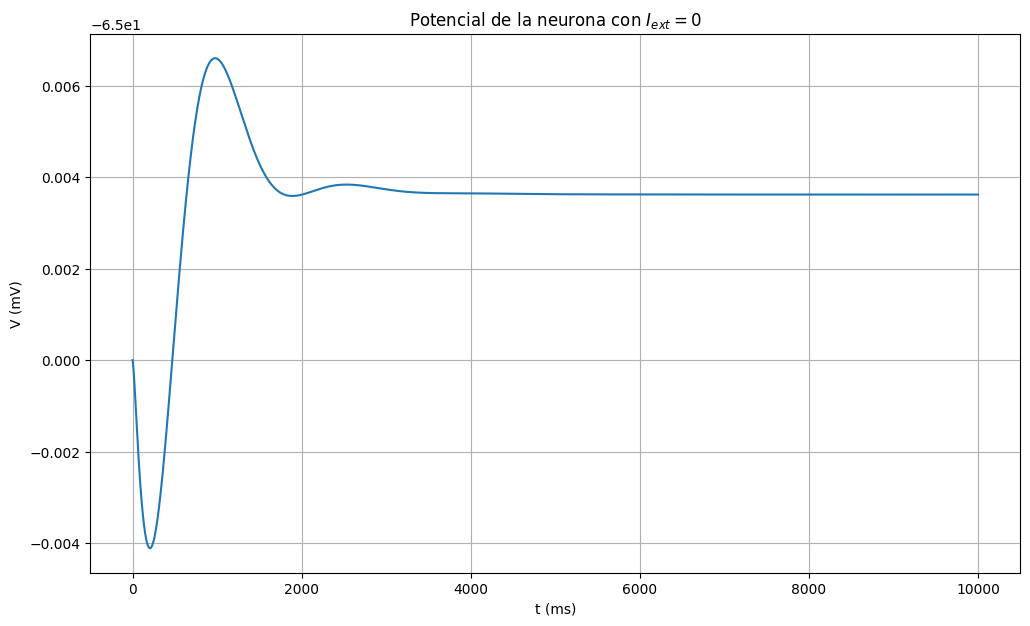

In [7]:
# Potencial de la neurona durante 100 ms
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(range(0,10000), v)
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona con $I_{ext}=0$')
plt.grid()

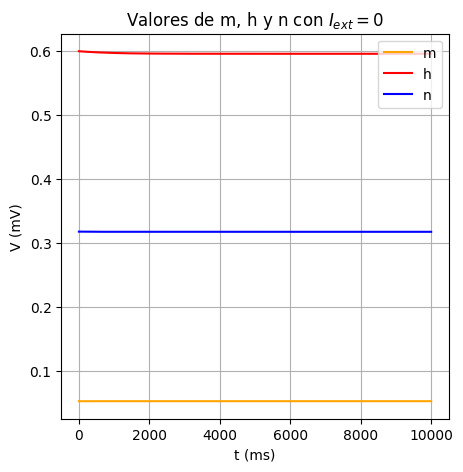

In [8]:
# Valores de m, n y h
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(0,10000), m,label="m",c="orange")
ax.plot(range(0,10000), h,label="h",c="red")
ax.plot(range(0,10000), n,label="n",c="blue")
ax.set_title('Valores de m, h y n con $I_{ext}=0$')
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.legend()
plt.grid()

In [9]:
save_fichero("docc.txt", v, m, h, n, range(0,10000))

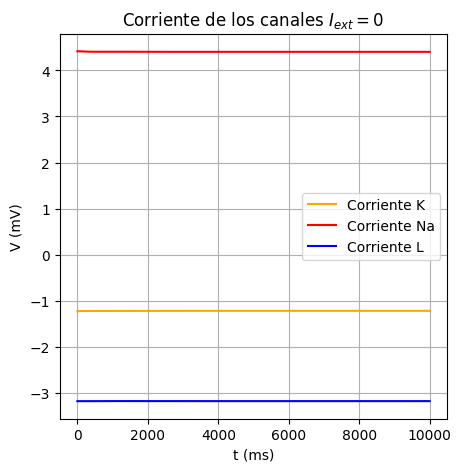

In [10]:
#Corriente en los canales de K,Na y L
ck= gk*n**4*(v-Vk)
cna= gna*m**3*h*(v-Vna)
cl=gl*(v-Vl)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(0,10000), cna,label="Corriente Na",c="orange")
ax.plot(range(0,10000), ck,label="Corriente K",c="red")
ax.plot(range(0,10000), cl,label="Corriente L",c="blue")
ax.set_title('Corriente de los canales $I_{ext}=0$')
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.legend({"Corriente Na", "Corriente K", "Corriente L"})
plt.grid()

En la gráfica 1 se observa que el potencial de la membrana no varía practicamente nada y se acaba manteniendo en su valor estacional durante todo el proceso, por lo que no se produce ningún potencial de acción. Esto se debe a que no hay flujo de corriente como se puede observar en la gráfica 3, a través de la membrana por ninguno de los canales y, por lo tanto, no hay cambios en los estados de activación o inactivación de los canales iónicos. Tambien es debido a que la corriente externa aportada no es óptima para la inducción del potencial de acción. En la gráfica 2, se observa que los valores n, h y m, que son las fracciones de los canales que estan activos o inactivos, los cuales no sufren ningún cambio en sus valores en ningún momento por lo que no se produce ningún flujo de iones.

De base se encuentran todos los canales en sus valores estacionarios y no cambian en ningún momento, por lo que no se produce ningún tipo de flujo de iones y de potencial de acción. Por este motivo, la corriente externa aplicada sobre la neurona debe ser superior para conseguir la generación del potencial de acción.

### $I_{ext}=0.1\mu A$

In [11]:
Ij[:5000]=In
HH(10000)

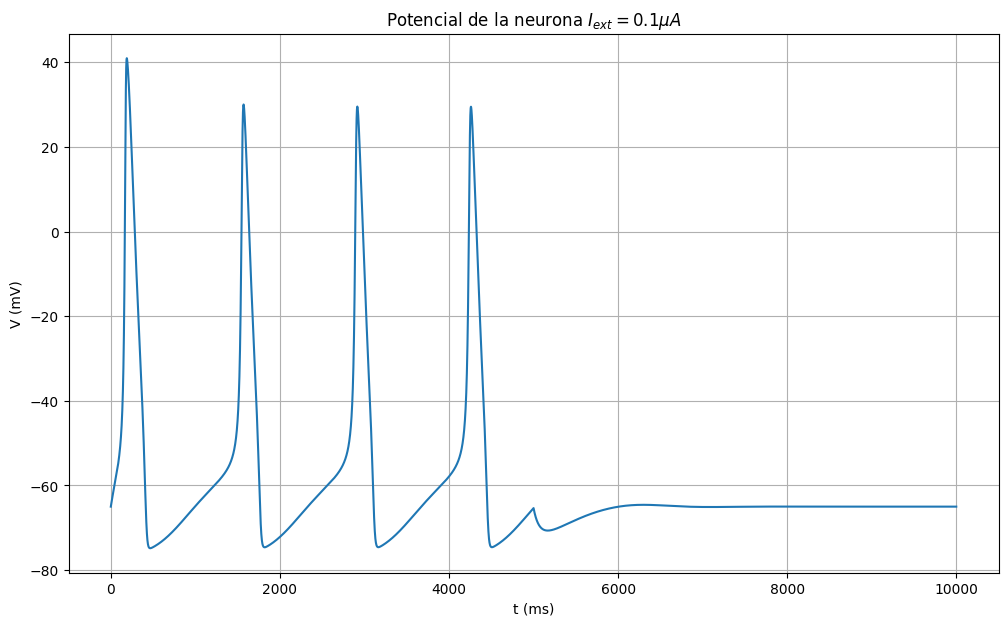

In [12]:
# Potencial de la neurona durante 100 ms
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(range(0,10000), v)
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.set_title('Potencial de la neurona $I_{ext}=0.1\mu A$')
plt.grid()

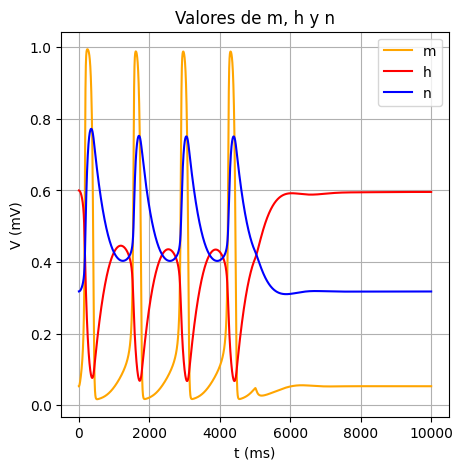

In [13]:
# Valores de m, n y h
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(range(0,10000), m,label="m",c="orange")
ax.plot(range(0,10000), h,label="h",c="red")
ax.plot(range(0,10000), n,label="n",c="blue")
ax.set_title('Valores de m, h y n')
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.legend()
plt.grid()

In [ ]:
save_fichero("docI0.1.txt", v, m, h, n, range(0,10000))

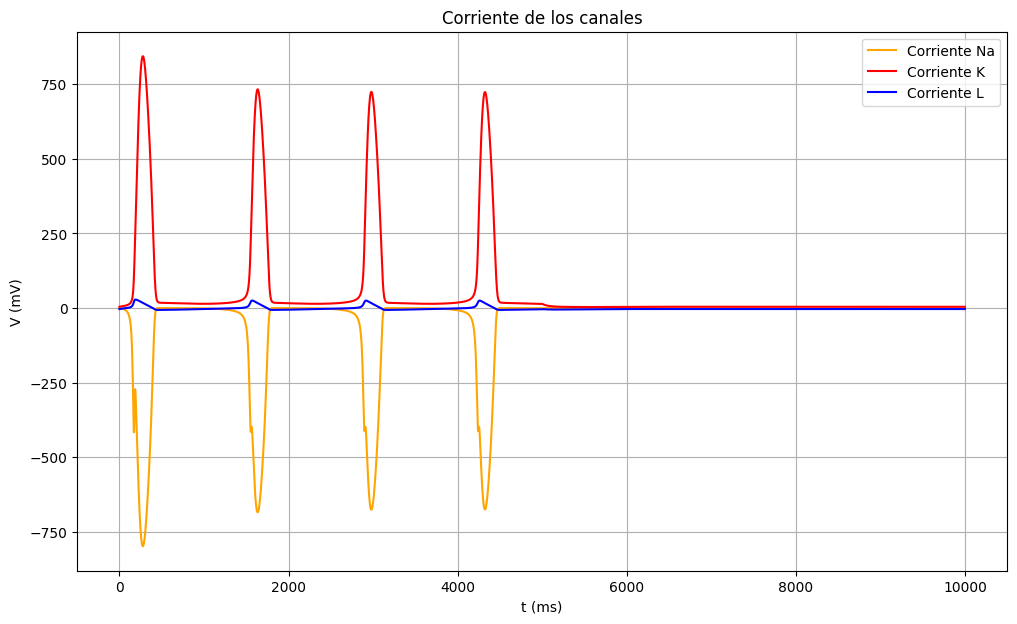

In [ ]:
#Corriente en los canales de Na, K y L
ck= gk*n**4*(v-Vk)
cna= gna*m**3*h*(v-Vna)
cl=gl*(v-Vl)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(range(0,10000), cna,label="Corriente Na",c="orange")
ax.plot(range(0,10000), ck,label="Corriente K",c="red")
ax.plot(range(0,10000), cl,label="Corriente L",c="blue")
ax.set_title('Corriente de los canales')
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.legend()
plt.grid()

En el gráfico 1 se observa que se produce 4 potenciales de acción durante los primeros 50 ms, que es cuando se le esta aplicando una corriente que produce que el potencial de la membrana cambie y se alcance los umbrales de activación de los canales de $Na^+$ y $K^+$. Se puede visualizar las siguientes etapas:

* La despolarización de la membrana (primera parte ascedente de la gráfica) debido a la aplicación de la corriente externa que permitirá alacanzar el umbral.

* Esta acción favorecerá el aumento de la permeabilidad al $Na^+$, provocando la apertura de los canales de $Na^+$ que permitirá la introducción de este ión al interior de la neurona, incrementando aun más la despolarización de la neurona. El resultado final de este proceso es que el potencial de membrana se vuelve positivo (electropositividad de la neurona).


* Durante la despolarización también se produce la apertura de los canales de $K^+$. No obstante, cuando el potencial de equilibrio de la membrana se aproxima al potencial de equilibrio del $Na^+$ (+40mV) se produce el cierre de los canales de $Na^+$. En este momento, se inicia la repolarización de la membrana (primera parte descedente de la gráfica).
* Los canales de $K^+$ como continuan abiertos provoca que el potencial de membrana se vuelva más negativo en el transcurso del tiempo. Cuando el potencial de membrana se iguala al potencial de equilibrio del $K^+$ se produce la hiperpolarización.


*  El potencial de membrana regresará al valor de equilibrio mediante la bomba de sodio-potasio y los canales de fuga.







Después de este procedimiento existe un periodo refractario, que corresponde con el intervalo de tiempo hasta la creación del siguiente potencial de acción.
En esta sección de la practica se podrá observar mejor la relación entre los diferentes canales.

En la gráfica 2, se puede observa como se activan y desactivan las fracciones de los iones, es decir los elementos n, h y m. Antes de todo, se va a aclarar que son estos tres elementos.

Estos tres elementos se comportan como si fuesen puertas que se van abriendo o cerrando controlando la salida y entrada de iones. El canal del ión $K^+$ esta compuesta por cuatro puertas donde n representa la probabilidad de apertura de esos canales activados por voltaje. El canal de $Na^+$ esta compuesto por tres puertas donde m representa la probabilidad de apertura de esos canales activados por voltaje y por una puerta donde h representa la probabilidad de apertura de ese canal inactivado por el voltaje. Según los cambios en el valor del voltaje de la membrana por una corriente externa harán que estos elementos se vayan activando o desactivado permitiendo el flujo por los canales de los iones.

Todo este proceso despolarización repolarización se producirá 4 veces, hasta que la intensidad vuelta a tener valor 0.

Como ya se sabe se producen 4 potenciales de acción, en los que los canales se activaran dejando pasar a los iones y ocurriendo un proceso de despolarización y repolarización de la membrana.

Se observa que el canal más rapido en activarse es el de sodio, que es el que realiza el proceso de despolarización. Durante este momento, al activarse y siendo la concentración de iones de $Na^+$ mayor en el exterior empezaran a entrar iones de sodio a la membrana y esto hará que el potencial de la membrana sea más positivo. En ese momento se observa que el valor de m es alto y el de h bajo por lo que esto permitirá el flujo de los iones de sodio.

Tras la apertura del canal de sodio se activará el canal de potasio. En este caso, al haber una concentración mayor en el interior de la membrana que en el exterior, empezarán a salir iones de $K^+$. Cuando el potencial de equilibrio de la membrana se acerque al potencial de equilibrio del $Na^+$ se inicia la repolarización y hace que el voltaje de la membrana baje y se cierre el canal de $Na^+$, por lo que el valor de m se ira reduciendo y h aumentando cuando n tengo un valor alto. Como se observa en el gráfico el cierre del canal de $Na^+$ no ocurre cuando empieza a aumentar n, durante un periodo de tiempo (potencial de acción) el canal de $Na^+$ y $K^+$ se matendrán activados manteniendo la despolarización.

Los límites de flujo en los canales estan limitados por la conductancia del canal lo cual se muestra en la gráfica 3. Este valor dependera de la diferencia potencial de la membrana y del canal y de la probabilidad de activarse o desactivarse del canal.

Por último, quedaría hablar del canal de Lick que se activa durante un corto periodo de tiempo cuando ocurre un potencial de acción y sirve para regularizar la exccitabilidad de la neurona.